# Visualizing Raw Premier League Data (1)

The source for this first piece of data: https://www.football-data.co.uk/englandm.php

Notes for interpreting this data: https://www.football-data.co.uk/notes.txt

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'../data/E0_2526.csv')
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,15/08/2025,20:00,Liverpool,Bournemouth,4,2,H,1,0,...,2.03,1.78,2.07,1.85,2.03,1.88,1.94,1.76,2.14,1.86
1,E0,16/08/2025,12:30,Aston Villa,Newcastle,0,0,D,0,0,...,2.05,1.80,2.02,1.89,2.06,1.80,1.95,1.74,2.14,1.86
2,E0,16/08/2025,15:00,Brighton,Fulham,1,1,D,0,0,...,1.83,2.03,1.93,2.00,1.84,2.03,1.80,1.96,1.91,2.08
3,E0,16/08/2025,15:00,Sunderland,West Ham,3,0,H,0,0,...,1.95,1.90,1.97,1.95,1.95,1.94,1.86,1.78,2.02,1.97
4,E0,16/08/2025,15:00,Tottenham,Burnley,3,0,H,1,0,...,1.98,1.88,1.99,1.93,1.98,1.91,1.88,1.83,2.07,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,E0,30/12/2025,20:15,Man United,Wolves,1,1,D,1,1,...,1.85,2.00,1.87,2.06,1.85,2.06,1.77,2.01,1.92,2.05
186,E0,01/01/2026,17:30,Crystal Palace,Fulham,1,1,D,1,0,...,1.90,1.95,1.96,1.96,1.91,1.95,1.88,1.90,2.02,1.95
187,E0,01/01/2026,17:30,Liverpool,Leeds,0,0,D,0,0,...,1.75,2.05,1.82,2.13,1.77,2.07,1.74,2.05,1.84,2.16
188,E0,01/01/2026,20:00,Brentford,Tottenham,0,0,D,0,0,...,1.73,2.08,1.82,2.13,1.80,2.08,1.74,2.02,1.83,2.19


Checking that the amount of matches per team is the same (as to not cause errors)

In [5]:
#finding matches per team
teams = df['HomeTeam'].unique().tolist()

matches_per_team = {}
for team in teams:
    home_matches = df[df['HomeTeam'] == team].shape[0]
    away_matches = df[df['AwayTeam'] == team].shape[0]
    total_matches = home_matches + away_matches
    matches_per_team[team] = total_matches

In [6]:
matches_per_team

{'Liverpool': 19,
 'Aston Villa': 19,
 'Brighton': 19,
 'Sunderland': 19,
 'Tottenham': 19,
 'Wolves': 19,
 'Chelsea': 19,
 "Nott'm Forest": 19,
 'Man United': 19,
 'Leeds': 19,
 'West Ham': 19,
 'Man City': 19,
 'Bournemouth': 19,
 'Brentford': 19,
 'Burnley': 19,
 'Arsenal': 19,
 'Crystal Palace': 19,
 'Everton': 19,
 'Fulham': 19,
 'Newcastle': 19}

Check if we can utilize a poisson model for this project by finding out how many goals per match is scored

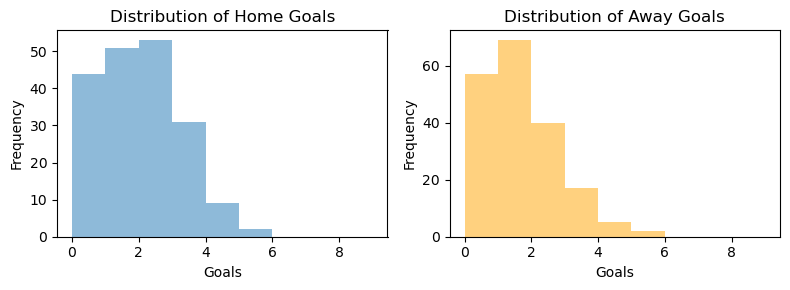

Average number of home goals: 1.56
Average number of away goals: 1.21


In [7]:
#histogram of FTAG and FTHG
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.hist(df['FTHG'], bins=range(0, 10), alpha=0.5, label='FTHG')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Home Goals')

ax2.hist(df['FTAG'], bins=range(0, 10), alpha=0.5, label='FTAG', color ='orange')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Away Goals')
plt.tight_layout()
plt.show()

#average home goals:
average_home_goals = df['FTHG'].mean()
print("Average number of home goals: " + str(round(average_home_goals, 2)))

#average away goals:
average_away_goals = df['FTAG'].mean()
print("Average number of away goals: " + str(round(average_away_goals, 2)))

### Scoreline Heatmap

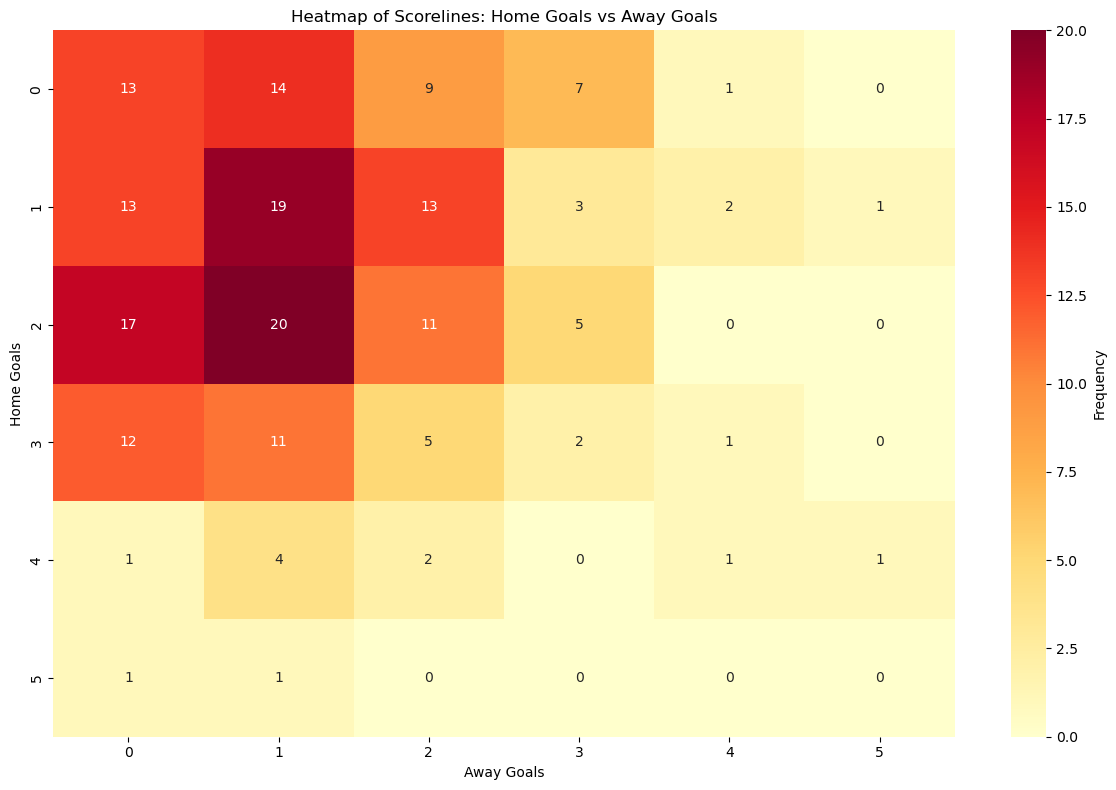

Total matches: 190
Total draws: 46
Draw frequency: 24.21%


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating a crosstab of home goals vs away goals
scoreline_matrix = pd.crosstab(df['FTHG'], df['FTAG'])

# creating a heatmap to visualize the scoreline frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(scoreline_matrix, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Frequency'})
plt.xlabel('Away Goals')
plt.ylabel('Home Goals')
plt.title('Heatmap of Scorelines: Home Goals vs Away Goals')
plt.tight_layout()
plt.show()

# general stats
total_matches = len(df)
draws = (df['FTHG'] == df['FTAG']).sum()
draw_percentage = (draws / total_matches) * 100
print(f"Total matches: {total_matches}")
print(f"Total draws: {draws}")
print(f"Draw frequency: {draw_percentage:.2f}%")

### Scatter Plot of Goal Difference vs. Points

## The Further Plan (For the next week)

| Question | Visualization that answers it |
|----------|----------|
| Is Poisson reasonable?  | Goals histogram + heatmap  |
| How strong is home advantage?  | Home vs away goals  |
| Do draws matter a lot? | Outcome proportions  |
| Are teams clearly separable?  | GD vs points  |
| Does form persist?  | Rolling points |
